# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. A simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

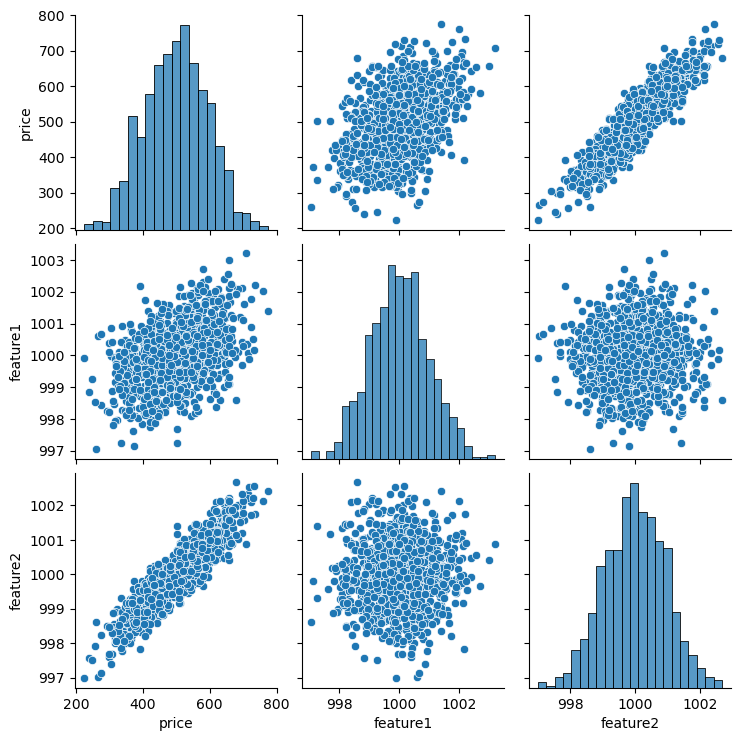

In [5]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [14]:
scaler = MinMaxScaler()

In [15]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [22]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [23]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [24]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [25]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 2s 4ms/step - loss: 256676.7812
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256591.4062
Epoch 3/250
22/22 [==============================] - 0s 4ms/step - loss: 256505.6719
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 256412.3594
Epoch 5/250
22/22 [==============================] - 0s 4ms/step - loss: 256307.4531
Epoch 6/250
22/22 [==============================] - 0s 11ms/step - loss: 256188.4062
Epoch 7/250
22/22 [==============================] - 0s 6ms/step - loss: 256054.0781
Epoch 8/250
22/22 [==============================] - 0s 4ms/step - loss: 255901.5312
Epoch 9/250
22/22 [==============================] - 0s 4ms/step - loss: 255730.7031
Epoch 10/250
22/22 [==============================] - 0s 4ms/step - loss: 255539.4062
Epoch 11/250
22/22 [==============================] - 0s 4ms/step - loss: 255327.6562
Epoch 12/250
22/22 [==============================] - 0s 4ms/s

22/22 [==============================] - 0s 3ms/step - loss: 28063.6680
Epoch 97/250
22/22 [==============================] - 0s 3ms/step - loss: 24451.7207
Epoch 98/250
22/22 [==============================] - 0s 3ms/step - loss: 21055.5664
Epoch 99/250
22/22 [==============================] - 0s 3ms/step - loss: 17892.3379
Epoch 100/250
22/22 [==============================] - 0s 3ms/step - loss: 14990.3057
Epoch 101/250
22/22 [==============================] - 0s 3ms/step - loss: 12333.8418
Epoch 102/250
22/22 [==============================] - 0s 3ms/step - loss: 9966.7139
Epoch 103/250
22/22 [==============================] - 0s 3ms/step - loss: 7934.1558
Epoch 104/250
22/22 [==============================] - 0s 3ms/step - loss: 6188.3950
Epoch 105/250
22/22 [==============================] - 0s 3ms/step - loss: 4831.0767
Epoch 106/250
22/22 [==============================] - 0s 3ms/step - loss: 3820.5132
Epoch 107/250
22/22 [==============================] - 0s 3ms/step - loss: 3

22/22 [==============================] - 0s 5ms/step - loss: 606.7228
Epoch 193/250
22/22 [==============================] - 0s 5ms/step - loss: 588.0970
Epoch 194/250
22/22 [==============================] - 0s 4ms/step - loss: 571.4633
Epoch 195/250
22/22 [==============================] - 0s 3ms/step - loss: 553.2753
Epoch 196/250
22/22 [==============================] - 0s 4ms/step - loss: 536.2991
Epoch 197/250
22/22 [==============================] - 0s 4ms/step - loss: 517.7800
Epoch 198/250
22/22 [==============================] - 0s 4ms/step - loss: 499.3520
Epoch 199/250
22/22 [==============================] - 0s 4ms/step - loss: 481.4343
Epoch 200/250
22/22 [==============================] - 0s 4ms/step - loss: 463.6232
Epoch 201/250
22/22 [==============================] - 0s 4ms/step - loss: 448.9035
Epoch 202/250
22/22 [==============================] - 0s 5ms/step - loss: 431.3242
Epoch 203/250
22/22 [==============================] - 0s 5ms/step - loss: 417.2652
Epoch 

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [26]:
model.history.history

{'loss': [256676.78125,
  256591.40625,
  256505.671875,
  256412.359375,
  256307.453125,
  256188.40625,
  256054.078125,
  255901.53125,
  255730.703125,
  255539.40625,
  255327.65625,
  255093.9375,
  254835.890625,
  254552.734375,
  254242.234375,
  253904.703125,
  253537.71875,
  253138.421875,
  252707.15625,
  252241.78125,
  251738.90625,
  251195.40625,
  250613.875,
  249992.5,
  249326.28125,
  248615.6875,
  247856.390625,
  247046.671875,
  246187.796875,
  245269.625,
  244299.65625,
  243277.9375,
  242185.78125,
  241043.71875,
  239830.53125,
  238553.296875,
  237213.09375,
  235805.84375,
  234320.09375,
  232767.703125,
  231130.28125,
  229428.84375,
  227644.609375,
  225780.109375,
  223838.375,
  221799.9375,
  219681.671875,
  217482.3125,
  215198.21875,
  212817.328125,
  210358.703125,
  207798.90625,
  205140.984375,
  202399.90625,
  199556.65625,
  196622.78125,
  193614.328125,
  190489.765625,
  187268.1875,
  183967.890625,
  180553.796875,
  17702

In [27]:
loss = model.history.history['loss'] 

In [28]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [29]:
model.metrics_names

['loss']

In [30]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [31]:
training_score

33.0104866027832

In [32]:
test_score

33.31790542602539

### Further Evaluations

In [33]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [34]:
test_predictions

array([[408.6518 ],
       [620.12036],
       [589.4083 ],
       [571.0408 ],
       [372.40347],
       [577.3209 ],
       [516.1935 ],
       [460.31747],
       [548.75183],
       [448.99283],
       [608.70166],
       [546.63245],
       [422.12564],
       [412.40637],
       [645.68756],
       [439.32257],
       [507.5971 ],
       [656.4273 ],
       [658.39984],
       [563.4338 ],
       [340.4261 ],
       [447.04303],
       [387.05917],
       [382.88702],
       [565.03143],
       [608.2163 ],
       [531.98566],
       [430.40604],
       [651.75806],
       [416.69144],
       [444.36707],
       [486.00497],
       [440.65594],
       [677.1728 ],
       [426.717  ],
       [421.18057],
       [500.98047],
       [549.226  ],
       [510.79337],
       [400.1899 ],
       [615.05725],
       [419.28162],
       [601.4001 ],
       [447.19272],
       [502.37   ],
       [578.26575],
       [663.18726],
       [490.64447],
       [324.08078],
       [486.41647],


In [35]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [36]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [37]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [38]:
test_predictions

0      408.651794
1      620.120361
2      589.408325
3      571.040771
4      372.403473
          ...    
295    529.107727
296    517.247742
297    606.525208
298    419.379639
299    414.532715
Length: 300, dtype: float32

In [39]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [40]:
pred_df.columns = ['Test Y','Model Predictions']

In [41]:
pred_df

,Test Y,Model Predictions
0,402.296319,408.651794
1,624.156198,620.120361
2,582.455066,589.408325
3,578.588606,571.040771
4,371.224104,372.403473
...,...,...
295,525.704657,529.107727
296,502.909473,517.247742
297,612.727910,606.525208
298,417.569725,419.379639


Let's compare to the real test labels!

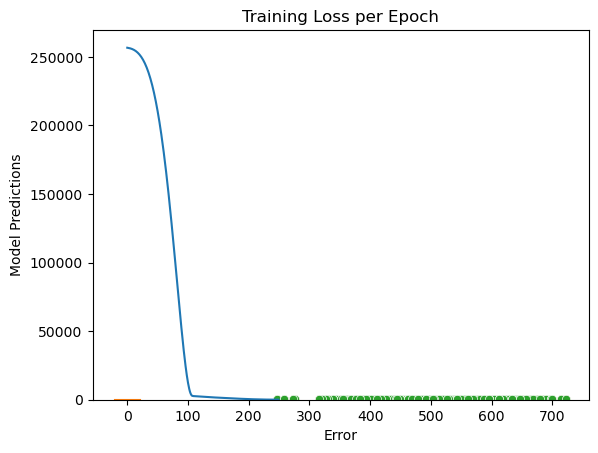

In [60]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)
plt.show()

In [43]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

C:\Users\ADMIN\anaconda3\envs\mytfenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


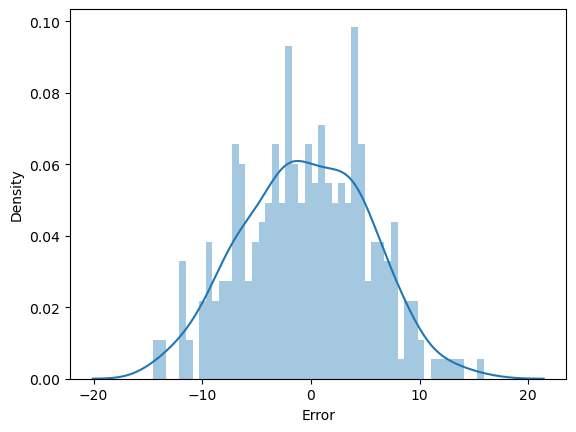

In [61]:
sns.distplot(pred_df['Error'],bins=50)
plt.show()

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.721136450567331

In [47]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

33.31791144484146

In [48]:
# Essentially the same thing, difference just due to precision
test_score

33.31790542602539

In [49]:
#RMSE
test_score**0.5

5.772166441296144

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [50]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [51]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [52]:
new_gem = scaler.transform(new_gem)

In [53]:
model.predict(new_gem)

1/1 [==============================] - 0s 38ms/step


array([[423.73822]], dtype=float32)

## Saving and Loading a Model

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [56]:
later_model = load_model('my_model.h5')

In [57]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 102ms/step


array([[423.73822]], dtype=float32)

In [58]:
# Here the fit method, when applied to the training dataset,
#learns the model parameters (for example, mean and standard deviation).
#We then need to apply the transform method on the training dataset to
#get the transformed (scaled) training dataset. We could also perform
#both of these steps in one step by applying fit_transform on the training dataset.

#Then why do we need 2 separate methods - fit and transform?

#In practice, we need to have separate training and testing datase
#and that is where having a separate fit and transform method helps.
#We apply fit on the training dataset and use the transform method on both
#the training dataset and the test dataset. Thus the training, as well as
#the test dataset, are then transformed(scaled) using the model parameters
#that were learned on applying the fit method to the training dataset.


#fit-normalization  #transform-scaling

#fit function in ML, that is used for training of model using data examples. 
#Fit function adjusts weights according to data values so that better accuracy can be achieved.
#After training, the model can be used for predictions, using .predict() method call. 




#next step is to normalize or scale the data
#cause if large values are used in feature set, that could cause error with the weights
#which could lead to vanishing and exploding gradients

#scaler is instance variable; feature is input and label is output

#for tensorflow we have to pass numpy arrays instead of pandas series so this
#as X is 2 dimensional so capital

